# How Can a Wellness Technology Company Play It Smart?

# Case Background:

Bellabeat is a high-tech manufacturer of health-focused products for women. Bellabeat wants to become a larger player in the global smart device market. So, their CEO, believe that analyzing smart device fitness data could unlock greater growth opportunities for the company. 
Business task/ Purpose of the case: Analyzing smart device data to gain insights into how consumers are using their smart devices.

Products of Bellabeat company:

○ Bellabeat app: The Bellabeat app provides users with health data related to their activity, sleep, stress, menstrual cycle, and mindfulness habits. This data can help users better understand their current habits and make healthy decisions. 

○ Leaf: Bellabeat’s classic wellness tracker can be worn as a bracelet, necklace, or clip. The Leaf tracker connects to the Bellabeat app to track activity, sleep, and stress.

○ Time: This wellness watch combines the timeless look of a classic timepiece with smart technology to track user activity, sleep, and stress. The Time watch connects to the Bellabeat app to provide insights into daily wellness.

○ Spring: This is a water bottle that tracks daily water intake using smart technology to ensure that users are appropriately hydrated throughout the day. The Spring bottle connects to the Bellabeat app to track users’ hydration levels.

# Ask
Business task/ Purpose of the case: Analyzing smart device data to gain insights into how consumers are using their smart devices. Analyses should answer the questions: what are some trends in smart device usage? How could these trends apply to Bellabeat customers? How could these trends help influence Bellabeat strategy? 
Analysis purpose: gaining insight into how people are already using their smart devices, from that suggesting suitable marketing strategy.
Key stakeholders: Urška Sršen: Bellabeat’s cofounder and Chief Creative Officer
○ Sando Mur: Mathematician and Bellabeat’s cofounder; key member of the Bellabeat executive team
○ Bellabeat marketing analytics team: A team of data analysts responsible for collecting, analyzing, and reporting data that helps guide Bellabeat’s marketing strategy.

# Prepare
Data: FitBit Fitness Tracker Data
This is a Kaggle data set which contains personal fitness tracker from thirty fitbit users. Thirty eligible Fitbit users consented to the submission of personal tracker data, including minute-level output for physical activity, heart rate, and sleep monitoring. It includes information about daily activity, steps, and heart rate that can be used to explore users’ habits
Where is your data stored? The data is stored in my local computer drive, which is downloaded from original dataset in below link: 
 https://www.kaggle.com/datasets/arashnic/fitbit/codea
How is the data organized? Is it in long or wide format? 
Long format. The data contains many tables about user activity, user heartrate, user sleep time.  
Are there issues with bias or credibility in this data? Does your data ROCCC? It is reliable, however, the sample of 30 people is quite small for a marketing analytics data set. It’s also collected by the third party.
How are you addressing licensing, privacy, security, and accessibility? This is a public dataset.

# Process

What tools are you choosing and why? I used Excel, SQL and R to analyze the data. 
Using BigQuery SQL, I started my own project named ggdacapstone, dataset was named as fitbit. Each table uploaded from the original dataset was also named accordingly to the table name in the original dataset.
In cleaning process, I used both Excel and SQL, to convert the data type to get only date in datetime or get only time(or activity hour) in datetime. 

# Analyze

## 1) Exploring the number of users in each dataset:
To explore the number of users in each dataset, first of all, I converted the datatype of data which is MM:DD:YYYY hh:mm:ss into MM:DD:YYYY before uploading the dataset to SQL. Then, in SQL Big Query, I ran below codes to explore the number of users in each dataset.

In [ ]:
#Count number of users in fitbit dailyActivity table:
SELECT
  	  COUNT(DISTINCT Id) AS Num_of_Id
FROM ggdacapstone.fitbit.dailyActivity

#Result: n = 33

#Count number of users in Fitbit Sleep dataset:
SELECT
      COUNT(DISTINCT Id) AS Num_of_Id
FROM ggdacapstone.fitbit.Sleep

#Result: n = 24

#Count number of users in Fitbit Weight dataset:
SELECT
      COUNT(DISTINCT Id) AS Num_of_Id
FROM ggdacapstone.fitbit.Weight

#Result: n = 8

For heartrate data, it is a bit more special. Since it’s a large dataset with more than 2 million rows and I cannot change the datetime type into date by using Excel, I imported the table with skemma for each row as STRING type. This step allowed me to import the table into SQL successfully, however, the row of the title was automatically doubled and all the dataset was saved under STRING type.Thus, I performed the following steps to change the data type:

In [ ]:
# Change dataset type:
SELECT
  CAST(Id AS FLOAT64) AS New_Id,
  LEFT(Time,9) AS date,
  CAST(Value AS FLOAT64) AS New_Value
FROM
  `ggdacapstone.fitbit.heartrate`
where
  Id <> "Id"

I then exported the result and named it as cleaned_heartrate. Now, I can start to analyze the clean_heartrate dataset to see many how many users that the heartrate data consists of.

In [ ]:
#Count number of users in Fitbit heartrate dataset:
SELECT
      COUNT(DISTINCT New_Id) AS Num_of_Id
FROM `ggdacapstone.fitbit.cleaned_heartrate`

# Result: n = 14


From above analysis: it is seen that more users prefer to use the daily Activity feature to track their wellness habit than other features such as sleep, heartrate or weight. The second most popular feature is sleep, the third popular one is heartrate, followed by weight. 

## 2)	Examine the relationship between total calories and total steps: 

To examine the relationship between total calories and total steps, I used R for analysis. 
First of all, I installed below the necessary packages in R:

In [ ]:
install.packages("tidyverse")
install.packages("skimr")
install.packages("ggplot2")
install.packages("janitor")
library(tidyverse)
library(skimr)
library(janitor)
library(ggplot2)
library(readr)

# Import the dataset into R
dailyActivity_merged <- read_csv("Business analysis course/Google data analytics/Course 8/archive (3)/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
View(dailyActivity_merged)

## Examine the relationship between TotalSteps and Calories

ggplot(data = dailyActivity_merged) +
  geom_point(mapping = aes(x = TotalSteps, y = Calories)) +
  geom_smooth(mapping = aes(x = TotalSteps, y = Calories))

Result:

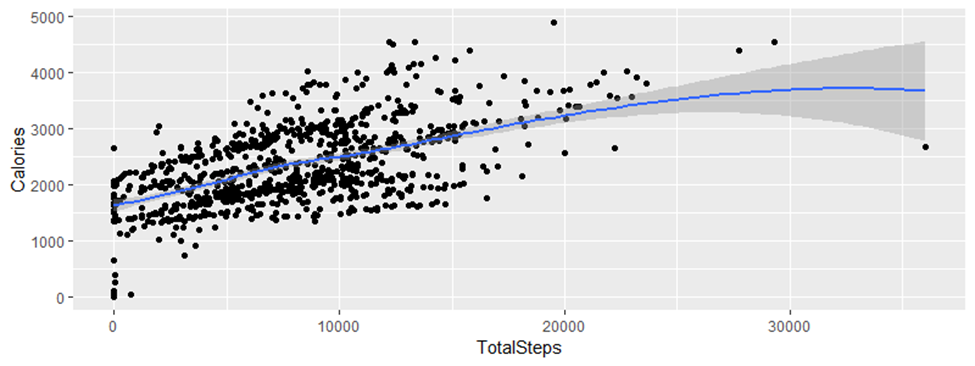

Result shows that total steps and calories have a positive relationship, the higher calories user consume, the higher total steps that users walk or run. 

## 3)	Examine which day users are most active in walking and which day users are least active in walking. 
I also examined which day users consumed highest calories and which day users consumed lowest calories. 
To do this, I used Excel to change the activity date into weekday by using text formula. After that, using SQL, I could answer the question which weekday users had the highest average number of steps and highest average distance. 

The result shows that Saturday is the day that users are most active walking, followed by Tuesday. The result also indicates that Saturday and Tuesday are also the days that users have the highest calories on average, meanwhile, on average, Sunday is typically not the day that users are active in walking. 

In [ ]:
SELECT 
  DISTINCT Weekday,
  AVG(TotalSteps) AS AVG_TotalSteps,
  AVG(TotalDistance) AS AVG_TotalDistance,
  AVG(Calories) AS AVG_TotalCalories
FROM
  `ggdacapstone.fitbit.dailyActivity`
GROUP BY
  Weekday
ORDER BY
AVG_TotalSteps DESC

Result: 
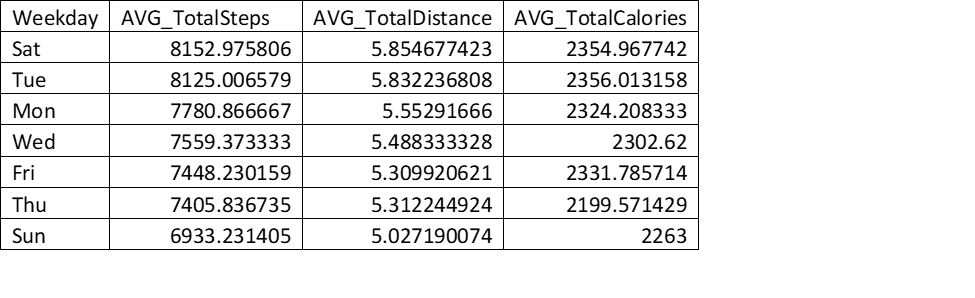

Visualization by Tableau:
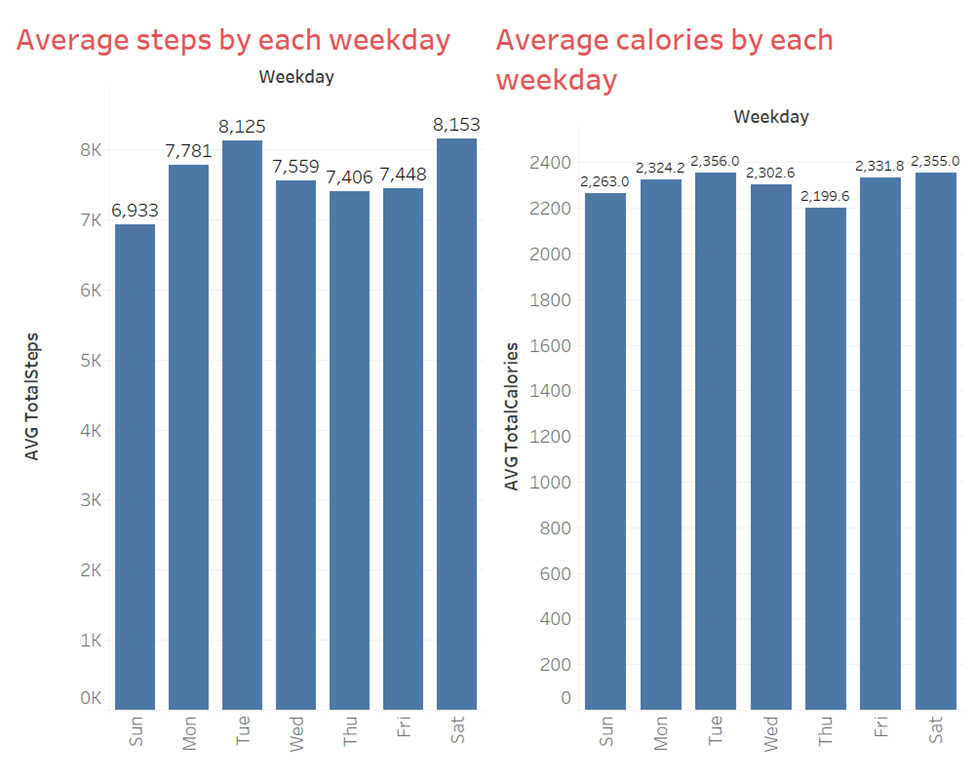

## 4)	Examine the question if higher sedentary time will lead to lower number of steps

In [ ]:
ggplot(data = dailyActivity_merged) +
  geom_point(mapping = aes(x = SedentaryMinutes, y = TotalSteps)) +
  geom_smooth(mapping = aes(x = SedentaryMinutes, y = TotalSteps))

Result: 
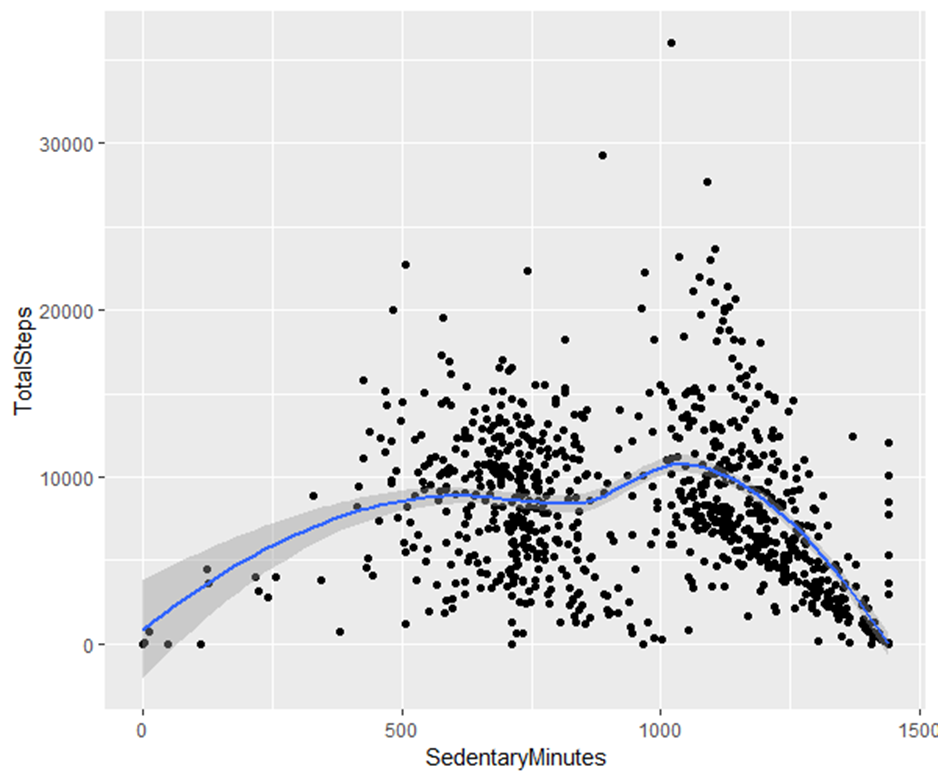

Sedentary Minutes and TotalSteps does not have a linear relationship. But it can be observed that number of steps will increase when sedentary minutes are from 0-500 mins, and number of steps will reduce when sedentary minutes are from 1000-1500. 
This is interesting, because we can recommend users who have sedentary time more than 1000 minutes should start exercising more. 

## 5)	Examine if walking more often will help users to have a longer sleep. 
To easier examine this relationship, I used SQL to merge data between TotalSteps and TotalMinutesAsleep by Id level, using below code.

In [ ]:
WITH temp_table AS (
SELECT 
  DISTINCT dailyActivity.Id AS Id,
  SUM(dailyActivity.TotalSteps) AS TotalSteps
FROM
  `ggdacapstone.fitbit.dailyActivity` AS dailyActivity
GROUP BY
  Id
ORDER BY
  TotalSteps DESC
)
SELECT 
  temp_table.Id,
  temp_table.TotalSteps,
  SUM(Sleep.TotalMinutesAsleep) AS TotalMinutesAsleep
FROM
  temp_table
INNER JOIN
  `ggdacapstone.fitbit.Sleep` AS Sleep
ON
  Sleep.Id = temp_table.Id
GROUP BY
  temp_table.Id,
  temp_table.TotalSteps
ORDER BY
  temp_table.TotalSteps DESC

Result:

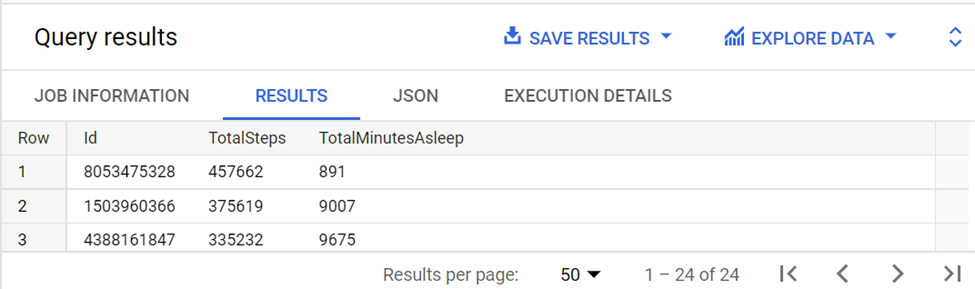

Then, I plotted the merged dataset on R and observed no relationship between Total Minutes Asleep and TotalSteps. 
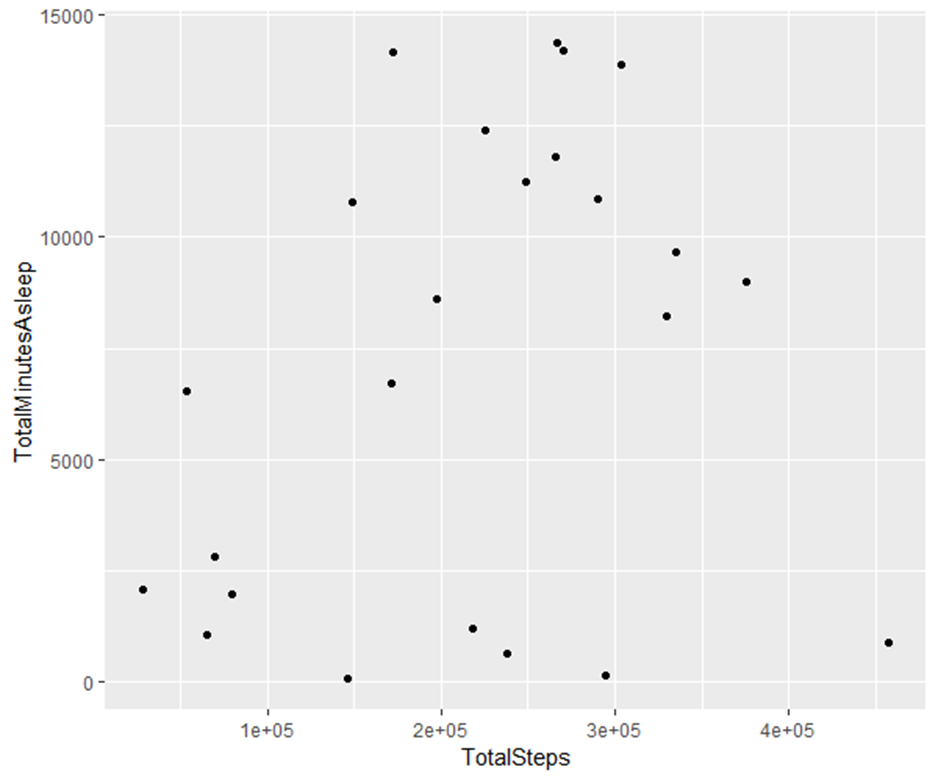

## 6)	Examine what time that users are most active. 
I used hourlyIntensities data to answer this question. First, to easily input in SQL, I opened this file in Excel and split ActivityHour data that combines both Day and Time to get only ActivityHour which was not including the date, month and year. Then, I input the data into SQL and coded as below:



In [ ]:
SELECT  
  ActivityHour,
  SUM(TotalIntensity) AS SUM_TotalIntensity
FROM `ggdacapstone.fitbit.hourlyIntensities1`
GROUP BY
ActivityHour

Result:
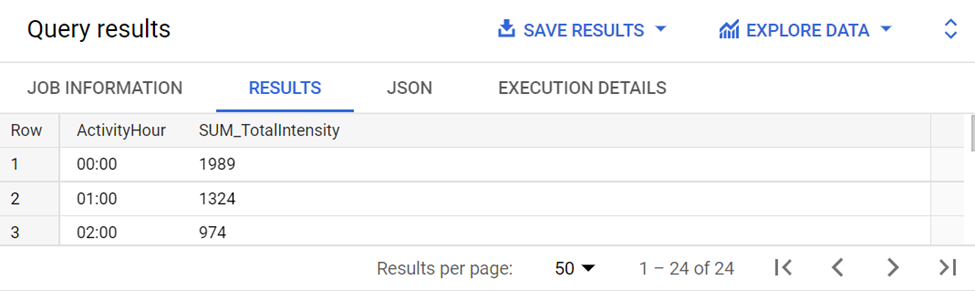

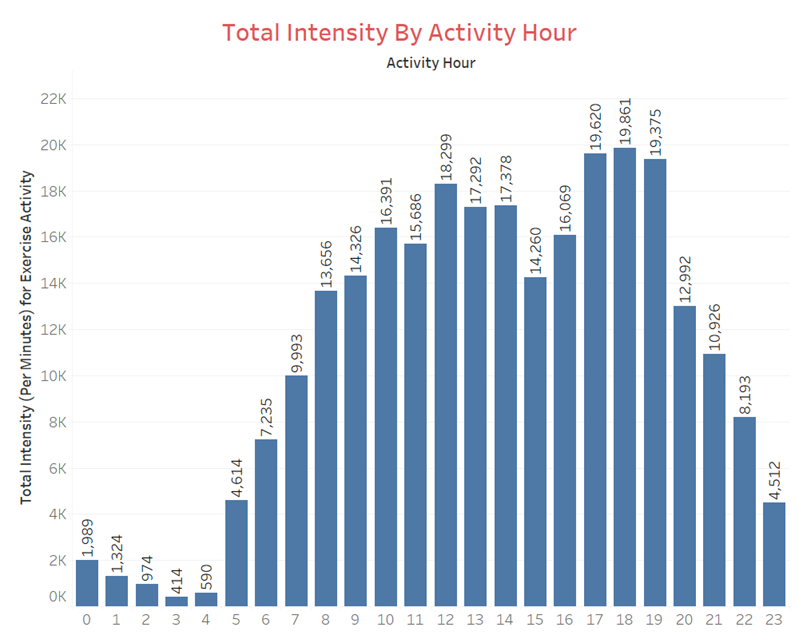
It can be seen that users are most active from 17-19h, which indicates that users will often exercise during this period of time. 

# Conclusion and recommendation:
My analysis above has provided some interesting marketing insights to Bellabeat company. Below is the summary of my findings and recommendation:

1)	More users prefer to use daily Activity feature to track their wellness habit than other features such as sleep, heartrate or weight. The second most popular feature is sleep, the third popular one is heartrate, followed by weight. This information can be used in featuring Bellabeat products. 

2)	Saturday is the day that users are most active in walking or running, followed by Tuesday. These 2 days are also the days that users consume the highest calories in the entire week. 

3)	Calories and Steps have a positive linear relationship. When users run or walk more often, they will also consume more calories. 

4)	 Sedentary Minutes and TotalSteps does not have a linear relationship. But it can be observed that number of steps will increase when sedentary minutes are from 0-500 mins, and number of steps will reduce when sedentary minutes are from 1000-1500. This is interesting, because we can recommend users who have sedentary time more than 1000 minutes should start exercising more. 

5)	There is, however, no relationship between Total Steps and Sleep duration. Exercising more does not help users to sleep longer time.

6)	It can be seen that users are most active from 17-19h, which indicates that users will often exercise during this period of time. In Bellabeat app, we can recommend users to practice exercise during this period of time. The data can actually be adjusted to each user data and we can advise excerse time for each user. 

7)	It would be better if this Fitbit dataset contains more demographic information of users such as their gender. Fitbit also does not have information about user hydration level, so Bellabeat can incorporate this information into their product and provide suggestions regarding suitable hydration level to its users. 
